# Load Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [5]:
totalClass = 7
shufflePixels = False
shuffleLabels = False

In [6]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(35000, 32, 32, 3)
(35000, 7)
(7000, 32, 32, 3)
(7000, 7)


Populating the interactive namespace from numpy and matplotlib


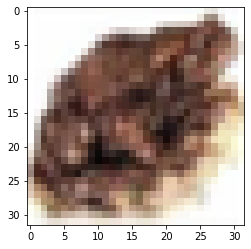

In [7]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

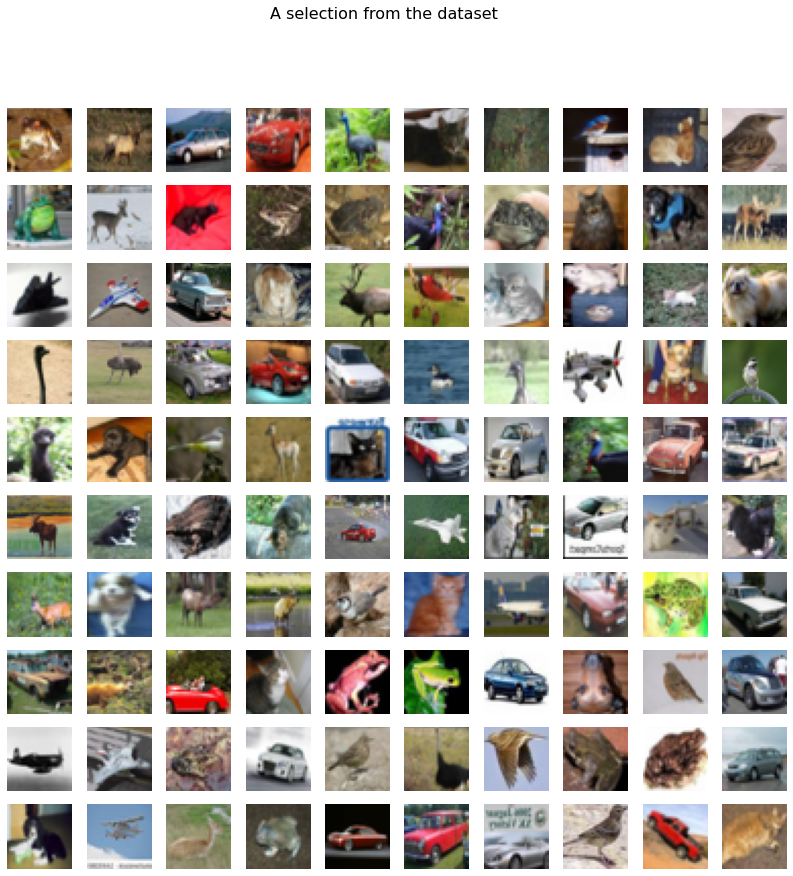

In [8]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx].reshape((32, 32, 3)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [9]:
vgg16 = models.vgg16(totalClass)
#vgg16.summary()
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [10]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 12s 37ms/step - loss: 1.9520 - accuracy: 0.1429
test loss, test acc: [1.9519903659820557, 0.1428571492433548]
Evaluate on test data
14/14 [==============================] - 1s 99ms/step - loss: 1.9524 - accuracy: 0.1429
test loss, test acc: [1.9524056911468506, 0.1428571492433548]


In [11]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 13s 31ms/step - loss: 1.8302 - accuracy: 0.2639 - val_loss: 1.6320 - val_accuracy: 0.3447
Epoch 2/250
350/350 [==============================] - 11s 31ms/step - loss: 1.5585 - accuracy: 0.3901 - val_loss: 1.3612 - val_accuracy: 0.4824
Epoch 3/250
350/350 [==============================] - 11s 30ms/step - loss: 1.3735 - accuracy: 0.4715 - val_loss: 1.2598 - val_accuracy: 0.5264
Epoch 4/250
350/350 [==============================] - 11s 30ms/step - loss: 1.2358 - accuracy: 0.5288 - val_loss: 1.1971 - val_accuracy: 0.5461
Epoch 5/250
350/350 [==============================] - 11s 30ms/step - loss: 1.1455 - accuracy: 0.5682 - val_loss: 1.0858 - val_accuracy: 0.5906
Epoch 6/250
350/350 [==============================] - 11s 30ms/step - loss: 1.0549 - accuracy: 0.6070 - val_loss: 1.1899 - val_accuracy: 0.5543
Epoch 7/250
350/350 [==============================] - 11s 30ms/step - loss: 0.9719 - accuracy: 0.6376 - val_loss: 0.9460 - val_ac

In [12]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 2s 30ms/step - loss: 6.8972e-07 - accuracy: 1.0000
test loss, test acc: [6.897204798406165e-07, 1.0]
Evaluate on test data
14/14 [==============================] - 0s 29ms/step - loss: 2.6889 - accuracy: 0.7561
test loss, test acc: [2.6889171600341797, 0.7561428546905518]


# Small

In [13]:
small = models.small(totalClass)
#small.summary()
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 1s 7ms/step - loss: 12.2112 - accuracy: 0.1476
test loss, test acc: [12.211151123046875, 0.1476285755634308]
Evaluate on test data
14/14 [==============================] - 0s 13ms/step - loss: 12.0829 - accuracy: 0.1483
test loss, test acc: [12.082879066467285, 0.14828571677207947]


In [15]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 4s 8ms/step - loss: 3.1462 - accuracy: 0.3001 - val_loss: 1.4236 - val_accuracy: 0.4721
Epoch 2/250
350/350 [==============================] - 3s 7ms/step - loss: 1.4371 - accuracy: 0.4455 - val_loss: 1.2637 - val_accuracy: 0.5077
Epoch 3/250
350/350 [==============================] - 2s 7ms/step - loss: 1.2896 - accuracy: 0.5067 - val_loss: 1.1581 - val_accuracy: 0.5630
Epoch 4/250
350/350 [==============================] - 2s 7ms/step - loss: 1.2022 - accuracy: 0.5452 - val_loss: 1.1303 - val_accuracy: 0.5696
Epoch 5/250
350/350 [==============================] - 3s 7ms/step - loss: 1.1403 - accuracy: 0.5719 - val_loss: 1.1045 - val_accuracy: 0.5790
Epoch 6/250
350/350 [==============================] - 3s 7ms/step - loss: 1.0903 - accuracy: 0.5886 - val_loss: 1.0718 - val_accuracy: 0.5941
Epoch 7/250
350/350 [==============================] - 2s 7ms/step - loss: 1.0421 - accuracy: 0.6105 - val_loss: 1.0247 - val_accuracy: 0.6240

In [16]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 0s 7ms/step - loss: 0.2509 - accuracy: 0.9361
test loss, test acc: [0.2508946359157562, 0.9361428618431091]
Evaluate on test data
14/14 [==============================] - 0s 7ms/step - loss: 0.6835 - accuracy: 0.7900
test loss, test acc: [0.6835471987724304, 0.7900000214576721]


#tNet

In [17]:
tNet = models.tNet(totalClass)
#tNet.summary()

In [18]:
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 4s 43ms/step - loss: 4.4976 - accuracy: 0.1450
test loss, test acc: [4.497612476348877, 0.14502857625484467]
Evaluate on test data
14/14 [==============================] - 1s 74ms/step - loss: 4.4889 - accuracy: 0.1461
test loss, test acc: [4.4889020919799805, 0.1461428552865982]


In [20]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 16s 41ms/step - loss: 1.6151 - accuracy: 0.3928 - val_loss: 1.4296 - val_accuracy: 0.4641
Epoch 2/250
350/350 [==============================] - 14s 39ms/step - loss: 1.3020 - accuracy: 0.5110 - val_loss: 1.2045 - val_accuracy: 0.5430
Epoch 3/250
350/350 [==============================] - 14s 39ms/step - loss: 1.1270 - accuracy: 0.5784 - val_loss: 1.1738 - val_accuracy: 0.5591
Epoch 4/250
350/350 [==============================] - 14s 39ms/step - loss: 0.9923 - accuracy: 0.6325 - val_loss: 1.1145 - val_accuracy: 0.5830
Epoch 5/250
350/350 [==============================] - 14s 39ms/step - loss: 0.8491 - accuracy: 0.6901 - val_loss: 1.2180 - val_accuracy: 0.5800
Epoch 6/250
350/350 [==============================] - 14s 39ms/step - loss: 0.7207 - accuracy: 0.7424 - val_loss: 1.0478 - val_accuracy: 0.6219
Epoch 7/250
350/350 [==============================] - 14s 39ms/step - loss: 0.5948 - accuracy: 0.7933 - val_loss: 1.0700 - val_ac

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 3s 39ms/step - loss: 0.0041 - accuracy: 0.9993
test loss, test acc: [0.004054935649037361, 0.9993143081665039]
Evaluate on test data
14/14 [==============================] - 1s 39ms/step - loss: 2.0964 - accuracy: 0.6819
test loss, test acc: [2.0963728427886963, 0.681857168674469]


# ConvNet

In [26]:
convNet = models.convNet(totalClass)
#convNet.summary()

In [27]:
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [28]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 4s 51ms/step - loss: 2.9001 - accuracy: 0.1489
test loss, test acc: [2.90008282661438, 0.14894285798072815]
Evaluate on test data
14/14 [==============================] - 1s 50ms/step - loss: 2.9144 - accuracy: 0.1503
test loss, test acc: [2.91438364982605, 0.1502857208251953]


In [29]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 15s 40ms/step - loss: 1.3989 - accuracy: 0.4562 - val_loss: 1.2883 - val_accuracy: 0.5113
Epoch 2/250
350/350 [==============================] - 14s 39ms/step - loss: 1.0998 - accuracy: 0.5806 - val_loss: 1.1087 - val_accuracy: 0.5829
Epoch 3/250
350/350 [==============================] - 14s 39ms/step - loss: 0.9704 - accuracy: 0.6319 - val_loss: 0.9097 - val_accuracy: 0.6659
Epoch 4/250
350/350 [==============================] - 14s 39ms/step - loss: 0.8722 - accuracy: 0.6694 - val_loss: 0.8519 - val_accuracy: 0.6864
Epoch 5/250
350/350 [==============================] - 14s 39ms/step - loss: 0.7895 - accuracy: 0.7043 - val_loss: 0.8446 - val_accuracy: 0.6936
Epoch 6/250
350/350 [==============================] - 14s 39ms/step - loss: 0.7247 - accuracy: 0.7303 - val_loss: 0.8925 - val_accuracy: 0.6833
Epoch 7/250
350/350 [==============================] - 14s 39ms/step - loss: 0.6662 - accuracy: 0.7549 - val_loss: 0.7606 - val_ac

In [30]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 3s 46ms/step - loss: 1.7871e-05 - accuracy: 1.0000
test loss, test acc: [1.787127257557586e-05, 1.0]
Evaluate on test data
14/14 [==============================] - 1s 46ms/step - loss: 1.2764 - accuracy: 0.8387
test loss, test acc: [1.2763553857803345, 0.8387143015861511]


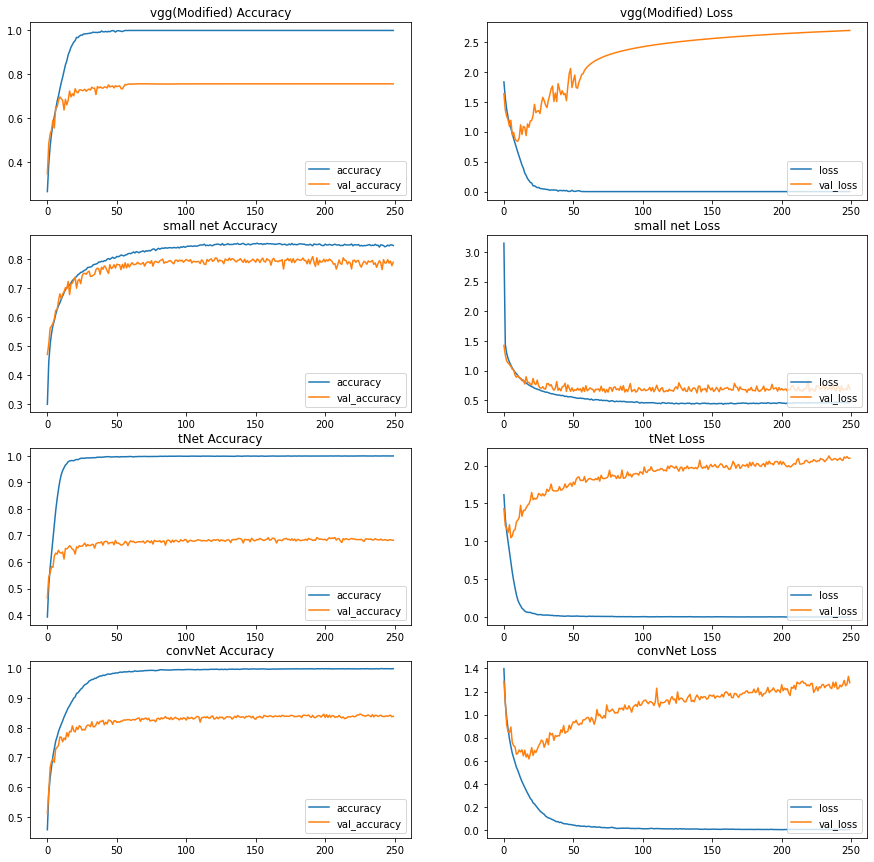

In [31]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1